# DMC - Python for Analytics - Sesión 04 
Profesor: Manuel Montoya | Data Scientist @ Belcorp

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

In [ ]:
import os
import pandas
import numpy

from PIL import Image

import seaborn
import matplotlib.pyplot as plt

# Clusterización de colores en imágenes

In [ ]:
path_base = '/content/drive/My Drive/python-for-analytics/sesion-06/data'
os.listdir(path_base)

Imágenes RGB 

In [5]:
img = Image.open(f"{path_base}/charlie.jpg").convert('RGB')
img.load()
image_numpy = numpy.asarray(img)
image_numpy.shape

(352, 471, 3)

In [9]:
# image_numpy[:5]

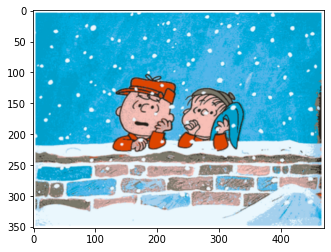

In [8]:
plt.imshow(image_numpy)

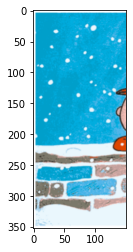

In [10]:
plt.imshow(image_numpy[:, :150])

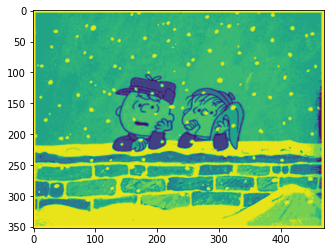

In [13]:
plt.imshow(image_numpy[:,:, 1])

In [14]:
pixels = image_numpy.reshape(image_numpy.shape[0] * image_numpy.shape[1], 3)
pixels.shape

(165792, 3)

In [ ]:
pixels

In [15]:
df_pixels = pandas.DataFrame(pixels)
df_pixels

,0,1,2
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
165787,255,255,255
165788,255,255,255
165789,255,255,255
165790,255,255,255


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
pixels_scaled = scaler.fit_transform(pixels)
pixels_scaled

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [19]:
model = KMeans(n_clusters = 2)
model.fit(pixels_scaled)
clusters = model.predict(pixels_scaled)

In [20]:
df_pixels["cluster"] = clusters
df_pixels

,0,1,2,cluster
0,255,255,255,1
1,255,255,255,1
2,255,255,255,1
3,255,255,255,1
4,255,255,255,1
...,...,...,...,...
165787,255,255,255,1
165788,255,255,255,1
165789,255,255,255,1
165790,255,255,255,1


In [21]:
df_means = df_pixels.groupby("cluster", as_index = False).mean()
df_means

,cluster,0,1,2
0,0,36.456117,160.877809,199.696484
1,1,214.629604,210.691853,212.707974


In [22]:
df_total = pandas.merge(df_pixels, df_means, on ="cluster", how = "left")
df_total

,0_x,1_x,2_x,cluster,0_y,1_y,2_y
0,255,255,255,1,214.629604,210.691853,212.707974
1,255,255,255,1,214.629604,210.691853,212.707974
2,255,255,255,1,214.629604,210.691853,212.707974
3,255,255,255,1,214.629604,210.691853,212.707974
4,255,255,255,1,214.629604,210.691853,212.707974
...,...,...,...,...,...,...,...
165787,255,255,255,1,214.629604,210.691853,212.707974
165788,255,255,255,1,214.629604,210.691853,212.707974
165789,255,255,255,1,214.629604,210.691853,212.707974
165790,255,255,255,1,214.629604,210.691853,212.707974


In [23]:
pixel_averages = df_total[['0_y', '1_y', '2_y']].values
pixel_averages

array([[214.62960445, 210.69185326, 212.7079745 ],
       [214.62960445, 210.69185326, 212.7079745 ],
       [214.62960445, 210.69185326, 212.7079745 ],
       ...,
       [214.62960445, 210.69185326, 212.7079745 ],
       [214.62960445, 210.69185326, 212.7079745 ],
       [214.62960445, 210.69185326, 212.7079745 ]])

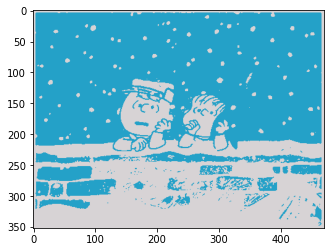

In [24]:
pixel_averages = pixel_averages.reshape(image_numpy.shape[0], image_numpy.shape[1], 3)
plt.imshow(numpy.round(pixel_averages).astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


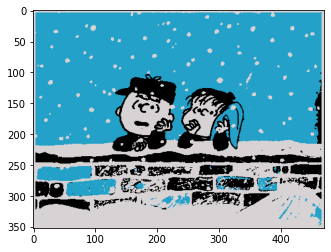

In [27]:
scaler = MinMaxScaler()
pixels_scaled = scaler.fit_transform(pixels)
df_pixels = pandas.DataFrame(pixels)

model = KMeans(n_clusters = 3)
model.fit(pixels_scaled)
clusters = model.predict(pixels_scaled)

df_pixels["cluster"] = clusters

df_total = pandas.merge(df_pixels, df_means, on ="cluster", how = "left")
pixel_averages = df_total[['0_y', '1_y', '2_y']].values

pixel_averages = pixel_averages.reshape(image_numpy.shape[0], image_numpy.shape[1], 3)
plt.imshow(numpy.round(pixel_averages).astype(int))